In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive/')
data = pd.read_csv('/content/drive/Shared drives/Team Mean Green Learning Machine/processed data/data.csv',usecols=['Date','Lat','Lon'])

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# ***Data by the Seasons***

In [42]:
data['Date'] = pd.to_datetime(data['Date'])
data['Day'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

In [43]:
data_winter = data[(data['Month'] == 12) | (data['Month'] == 1) | (data['Month'] == 2)]
len(data_winter)

4217421

In [44]:
data_spring = data[(data['Month'] == 3) | (data['Month'] == 4) | (data['Month'] == 5)]
len(data_spring)

8453114

In [45]:
data_summer = data[(data['Month'] == 6) | (data['Month'] == 7) | (data['Month'] == 8)]
len(data_summer)

5106135

In [46]:
data_fall = data[(data['Month'] == 9) | (data['Month'] == 10) | (data['Month'] == 11)]
len(data_fall)

1028136


#***Data by Times of the Day***

In [47]:
afterDarkHours = ['00','01', '02','03','04', '05', '06']
night = data[data['Day'].isin(afterDarkHours)]
day = data[~data['Day'].isin(afterDarkHours)]

In [48]:
hours = data['Date'].dt.hour
hours

0            9
1            9
2            9
3           10
4           10
            ..
18804801    22
18804802    22
18804803    22
18804804    22
18804805    22
Name: Date, Length: 18804806, dtype: int64

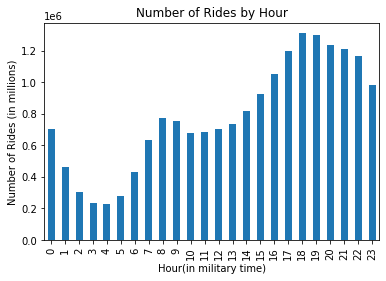

In [49]:
hours.value_counts(sort=False).plot.bar(x='Hour', y='# of Rides', title="Number of Rides by Hour", xlabel='Hour(in military time)', ylabel='Number of Rides (in millions)')

#***Data by Month***

Text(0.5, 1.0, 'Number of Rides By Month and Year')

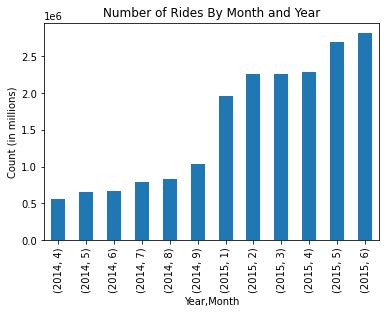

In [50]:
data_2014 = data[data['Year'] == 2014]
data.groupby(by=['Year','Month']).count()['Lat'].plot.bar()
plt.ylabel('Count (in millions)')
plt.title('Number of Rides By Month and Year')

# ***Data by Days of the Week***



In [51]:
days = data['Date'].dt.dayofweek
data_with_days = data.assign(Day = days) 

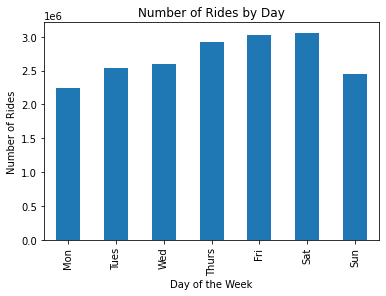

In [52]:
days.value_counts(sort=False).plot.bar(xlabel='Day of the Week', ylabel="Number of Rides", title="Number of Rides by Day")
plt.xticks(range(7), ('Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'))
plt.show()

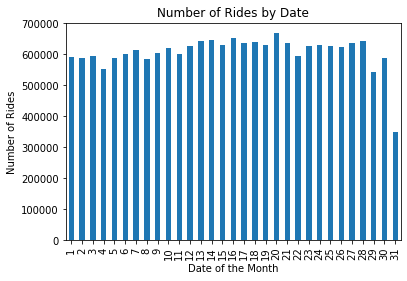

In [53]:
data['Day'].value_counts(sort=False).plot.bar(xlabel='Date of the Month', ylabel="Number of Rides", title="Number of Rides by Date")

# **Major Trends**


*   Saturday and Friday are the busiest days
*   Busiest hours start from 3pm to 11pm with the peak at 6pm

